Exception ignored in: 'pyCalc.cError'
ValueError: <invalid operation: colwise* >left is a 4x1 matrix but right is a 4x1 matrix


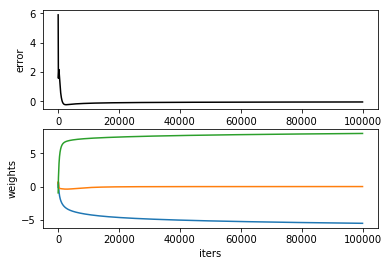

In [1]:
import numpy as np
import pyCalc as p
import random
p.setMode("quiet")
xs = p.var("constant",np.array([
                                   [1,0,0],
                                   [1,1,0],
                                   [1,0,1],
                                   [1,1,1]
                               ]
                               , dtype= float))
ys = p.var("constant", np.array(
                                [0,0,5,5]
                                , dtype=float))
np.random.seed(1)
weights =2*np.random.random((3,1)) - 1
ws = p.var("independent", 3,1)

l0 = p.function(xs,ws, "*") #4x1
l1 = p.function(l0, "sigmoid") #4x1

weights2 =np.array([ 2.5 ] , dtype= float)
ws2 = p.var("independent", 1,1)

l2 = p.function(l1,ws2, "*") #4x1
l2_error = p.function(ys.T(), l2, "-")



tmp2 = p.function(l1.T(),l2_error, "*")

sig = p.function(l1, "sigmoid_r")
l1_delta = p.function(sig, l2_error, "colwise*")
l1_delta2 = p.function(xs.T(),l1_delta, "*")

tmp = p.function(l1_delta2,ws2, "*")

tmp.value(dict([(ws,weights), (ws2, weights2)]))
g= []
h = []
for i in range(100000):
    t0 = weights + 0.01*tmp.value(dict([(ws,weights), (ws2, weights2)]))
    t1 = weights2 + 0.001*tmp2.value(dict([(ws,weights), (ws2, weights2)]))
    weights = t0
    weights2 = t1
    g.append(np.sum(l2_error.value(dict([(ws,weights), (ws2, weights2)]))))
    h.append(weights.tolist())


import matplotlib.pyplot as plt
x_data = [i for i in range(len(g))]
y_data = [[h[i][j] for i in range(len(h))] for j in range(len(h[0]))]
plt.figure(1)
plt.subplot(211)
plt.ylabel('error')
plt.xlabel('iters')
plt.plot(x_data, g, 'k')

plt.subplot(212)
plt.ylabel('weights')
plt.xlabel('iters')
for d in y_data:
    plt.plot(x_data, d)

plt.show()

In [2]:
l2.value(dict([(ws,weights), (ws2, weights2)]))

array([[ 0.020933  ],
       [ 0.02086294],
       [ 5.0002096 ],
       [ 4.99888689]])

In [3]:
weights2

array([[ 5.42610157]])

In [4]:
l2_error.value(dict([(ws,weights), (ws2, weights2)]))

array([[-0.020933  ],
       [-0.02086294],
       [-0.0002096 ],
       [ 0.00111311]])

In [5]:
l1.value(dict([(ws,weights), (ws2, weights2)]))

array([[ 0.00385783],
       [ 0.00384492],
       [ 0.92151051],
       [ 0.92126674]])

In [6]:
l2.value(dict([(ws,weights), (ws2, weights2)]))

array([[ 0.020933  ],
       [ 0.02086294],
       [ 5.0002096 ],
       [ 4.99888689]])

In [7]:
xs = p.var("constant",np.array([
                                   [5,0,0],
                                   [1,5,0],
                                   [1,0,5],
                                   [5,1,1]
                               ]
                               , dtype= float))
ys = p.var("constant", np.array(
                                [17,3,-6,5]
                                , dtype=float))
ys.value()

array([[ 17.,   3.,  -6.,   5.]])

Exception ignored in: 'pyCalc.cError'
ValueError: <invalid operation: colwise* >left is a 100x1 matrix but right is a 100x1 matrix


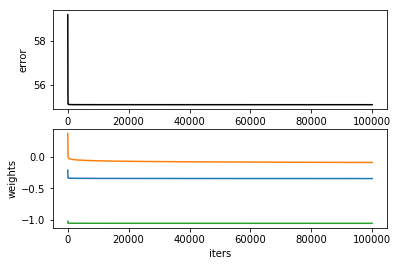

In [8]:
from math import exp
import numpy as np
import pyCalc as p
import random
p.setMode("quiet")
xxx = [[random.randint(1,101),random.randint(1,101),random.randint(1,101)] for x in range(100)]
xs = p.var("constant",np.array(xxx
                               , dtype= float))

yy = [3*(1/(1+exp(-2*d[0]+3*d[1]+d[2]))) for d in xxx]
ys = p.var("constant",np.array(yy
                               , dtype= float))

np.random.seed(1)
weights =2*np.random.random((3,1)) - 1
ws = p.var("independent", 3,1)

l0 = p.function(xs,ws, "*") #4x1
l1 = p.function(l0, "sigmoid") #4x1

weights2 =2*np.random.random((1,1)) - 1
ws2 = p.var("independent", 1,1)

l2 = p.function(l1,ws2, "*") #4x1
l2_error = p.function(ys.T(), l2, "-")



tmp2 = p.function(l1.T(),l2_error, "*")

sig = p.function(l1, "sigmoid_r")
l1_delta = p.function(sig, l2_error, "colwise*")
l1_delta2 = p.function(xs.T(),l1_delta, "*")

tmp = p.function(l1_delta2,ws2, "*")

tmp.value(dict([(ws,weights), (ws2, weights2)]))
g= []
h = []
for i in range(100000):
    t0 = weights + 0.01*tmp.value(dict([(ws,weights), (ws2, weights2)]))
    t1 = weights2 + 0.001*tmp2.value(dict([(ws,weights), (ws2, weights2)]))
    weights = t0
    weights2 = t1
    g.append(np.sum(l2_error.value(dict([(ws,weights), (ws2, weights2)]))))
    h.append(weights.tolist())


import matplotlib.pyplot as plt
x_data = [i for i in range(len(g))]
y_data = [[h[i][j] for i in range(len(h))] for j in range(len(h[0]))]
plt.figure(1)
plt.subplot(211)
plt.ylabel('error')
plt.xlabel('iters')
plt.plot(x_data, g, 'k')

plt.subplot(212)
plt.ylabel('weights')
plt.xlabel('iters')
for d in y_data:
    plt.plot(x_data, d)

plt.show()

In [9]:
weights2

array([[-0.29324288]])

In [10]:
weights

array([[-0.34479302],
       [-0.0891443 ],
       [-1.05555975]])

In [11]:
l2_error.value(dict([(ws,weights), (ws2, weights2)]))

array([[  1.77002716e-28],
       [  1.84325238e-05],
       [  5.97597230e-27],
       [  3.00000000e+00],
       [  1.79305098e-48],
       [  1.62904149e-16],
       [  8.51534001e-21],
       [  9.17706681e-07],
       [  2.91361987e-21],
       [  3.82508724e-47],
       [  5.58861113e-50],
       [  2.99899395e+00],
       [  2.50341512e-25],
       [  3.00000000e+00],
       [  3.00000000e+00],
       [  3.24061864e-07],
       [  3.00000000e+00],
       [  1.34213379e-37],
       [  3.15918521e-20],
       [  1.52014877e-47],
       [  3.15056347e-16],
       [  1.57433320e-12],
       [  1.50000000e+00],
       [  9.91710188e-37],
       [  8.63360191e-51],
       [  3.00000000e+00],
       [  5.43099737e-40],
       [  1.03909984e-40],
       [  3.14226447e-27],
       [  1.04096423e-19],
       [  2.64239123e+00],
       [  4.07260483e-33],
       [  9.31236495e-34],
       [  2.49458408e-06],
       [  6.20788483e-19],
       [  2.35345276e-64],
       [  1.39766584e-14],
 

In [12]:
yy

[1.7700271624791183e-28,
 1.8432523806644153e-05,
 1.8367630697488912e-81,
 3.0,
 1.5273212426850327e-87,
 3.8849945775269506e-100,
 1.962852185715437e-68,
 9.177066807768742e-07,
 2.756587864545866e-122,
 5.851179900390746e-65,
 1.2060180647230065e-73,
 2.998993949608601,
 7.140799226083201e-26,
 2.999999999999962,
 2.9999999999997193,
 4.2604138740308156e-97,
 3.0,
 1.3421337918543361e-37,
 3.159185207266144e-20,
 3.0677067213519102e-86,
 2.55991428772322e-16,
 5.937779633840714e-32,
 1.5,
 9.917101880282202e-37,
 6.416597894698618e-62,
 3.0,
 6.416597894698618e-62,
 1.0291009583789104e-89,
 1.6749111183005662e-84,
 5.851179900390746e-65,
 2.642391233933647,
 8.911335136562072e-73,
 5.066735640673597e-48,
 2.4945840829923964e-06,
 1.2559181997912695e-50,
 1.590515599827697e-64,
 1.3976658435310127e-14,
 0.007417869469904323,
 2.1525287919493234e-65,
 1.3976658435310127e-14,
 0.3576087660663526,
 1.4342678651656406e-24,
 2.9999999831916107,
 1.6749111183005662e-84,
 3.2782969901298934

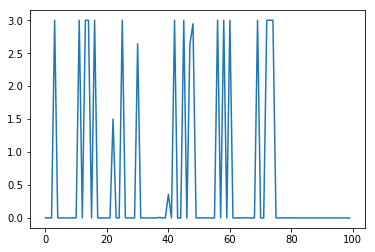

In [13]:
plt.subplot(111)
x_data = [i for i in range(len(yy))]

plt.plot(x_data,[i[0] for i in l2_error.value(dict([(ws,weights), (ws2, weights2)])).tolist()])
plt.show()

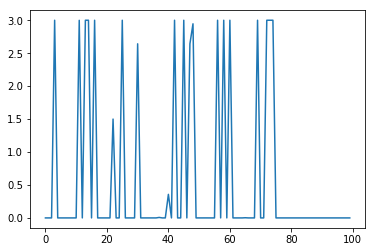

In [14]:
plt.plot(x_data,yy)
plt.show()